### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [430]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [431]:
data = pd.read_csv('data/coupons.csv')

In [432]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [433]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [434]:
#checking for null values
nv = data.isna().sum()
nv

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [435]:
#drop the car column since there are only 108 rows of data in the column
data2 = data.drop('car', axis = 1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [436]:
#drop rows with null values
data_clean = data2.dropna(axis = 0)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [437]:
#rename column 'Y' to be easily understood
coupon_acceptance = data_clean.rename(columns = {"Y" : "coupon_accepted"})
coupon_acceptance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon? 



In [438]:
#find proportion of users who accepted the coupon
proportion = (coupon_acceptance['coupon_accepted'].value_counts(normalize=True) * 100)
proportion

coupon_accepted
1    56.933521
0    43.066479
Name: proportion, dtype: float64

>**Discovered 56.93% of drivers accepted a coupon.**

5. Use a bar plot to visualize the `coupon` column.

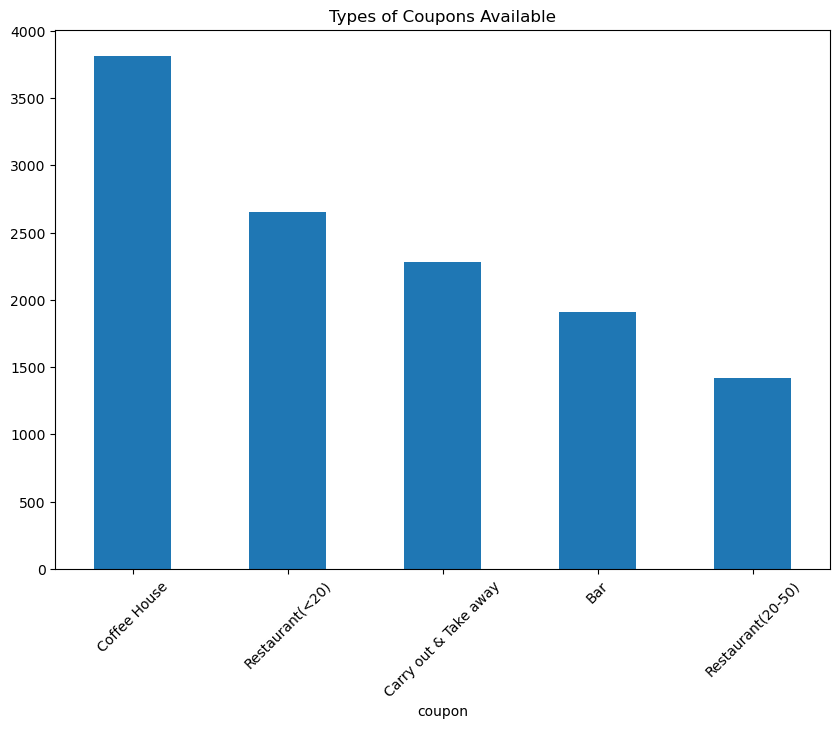

In [439]:
coupon_plot = coupon_acceptance['coupon'].value_counts()
coupon_plot.plot(kind='bar',figsize =(10,7))
plt.title('Types of Coupons Available')
plt.xticks(rotation = 45)
plt.show()

6. Use a histogram to visualize the temperature column.

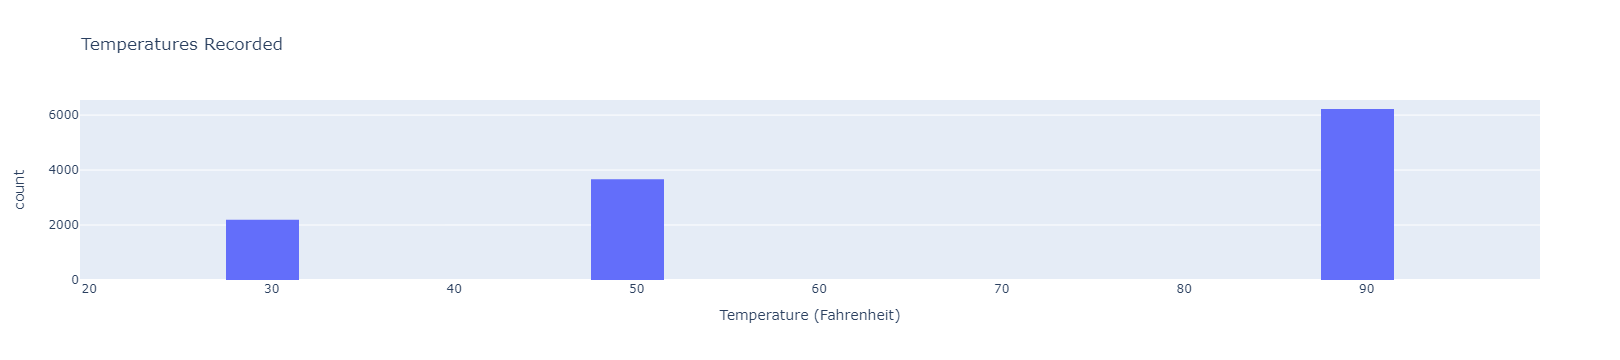

In [440]:
fig = px.histogram(coupon_acceptance, x = "temperature",
                  title = 'Temperatures Recorded',
                  labels = {'temperature':'Temperature (Fahrenheit)'})
fig.update_layout(bargap = 0.8)
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [441]:
bar_coupons = pd.DataFrame(coupon_acceptance.query('coupon == "Bar"'))
bar_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

In [442]:
bar_coupons.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accepted
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [443]:
#find proportion of users who accepted the coupon
proportion_bar = (bar_coupons['coupon_accepted'].value_counts(normalize=True) * 100)
proportion_bar

coupon_accepted
0    58.808155
1    41.191845
Name: proportion, dtype: float64

>**Discovered 41.19% of drivers accepted a bar coupon.**

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [444]:
#replace strings in the bar column for better sortation / readability
bar_coupons_visits = bar_coupons.copy()
bar_coupons_visits["Bar"] = bar_coupons_visits["Bar"].str.replace('never','0')
bar_coupons_visits["Bar"] = bar_coupons_visits["Bar"].str.replace('less1','0-1')
bar_coupons_visits["Bar"] = bar_coupons_visits["Bar"].str.replace('1~3','1-3')
bar_coupons_visits["Bar"] = bar_coupons_visits["Bar"].str.replace('4~8','4-8')
bar_coupons_visits["Bar"] = bar_coupons_visits["Bar"].str.replace('gt8','8+')
bar_coupons_visits['Bar']

24       0
35       0
39       0
46       0
57       0
        ..
12663    0
12664    0
12667    0
12670    0
12682    0
Name: Bar, Length: 1913, dtype: object

In [445]:
#find acceptance rate of bar coupon by number of visits
compare_bar = (bar_coupons_visits.groupby('Bar').size()/bar_coupons_visits['coupon_accepted'].count())*100
compare_bar

Bar
0      41.191845
0-1    28.907475
1-3    19.811814
4-8     7.684266
8+      2.404600
dtype: float64

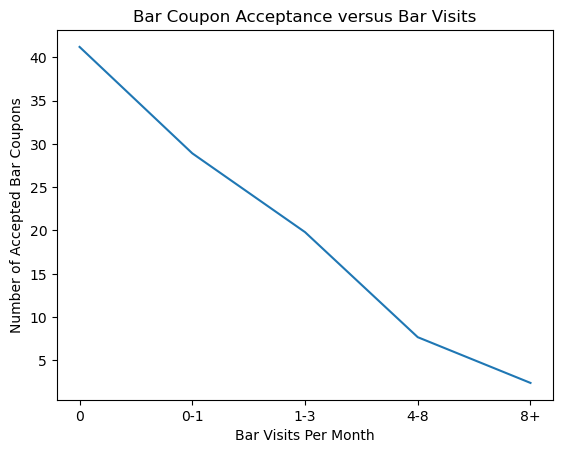

In [446]:
#create a plot to visualize the data
sns.lineplot(data = compare_bar)
plt.xlabel('Bar Visits Per Month')
plt.ylabel('Number of Accepted Bar Coupons')
plt.title('Bar Coupon Acceptance versus Bar Visits')
plt.show()

>**Drivers that went to a bar fewer than 3 times a month accepted a coupon 89.91% of the time, compared to drivers who visit bars more than 4 times (10.08%).**

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [447]:
#adjust data to fit the categories we're looking for (bucketize ages)
bc = bar_coupons_visits.copy()
bc["age"] = bc["age"].str.replace('below21','0-20')
bc["age"] = bc["age"].str.replace('26','25+')
bc["age"] = bc["age"].str.replace('31','25+')
bc["age"] = bc["age"].str.replace('36','25+')
bc["age"] = bc["age"].str.replace('41','25+')
bc["age"] = bc["age"].str.replace('46','25+')
bc["age"] = bc["age"].str.replace('50plus','25+')
bc

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accepted
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,25+,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,25+,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,25+,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,25+,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,25+,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,25+,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


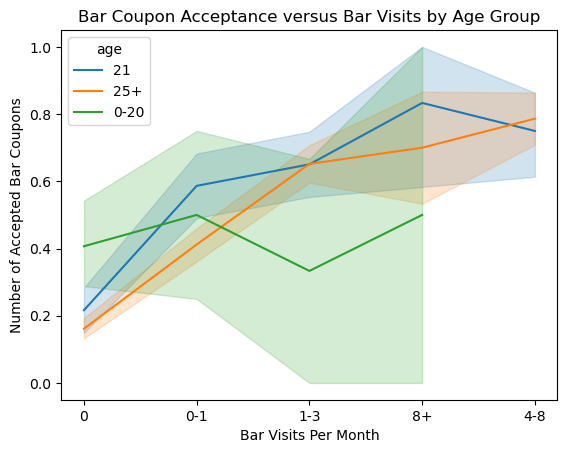

In [448]:
#create a plot to help visualize the data
sns.lineplot(data = bc, x = 'Bar', y = 'coupon_accepted', hue = "age")
plt.xlabel('Bar Visits Per Month')
plt.ylabel('Number of Accepted Bar Coupons')
plt.title('Bar Coupon Acceptance versus Bar Visits by Age Group')
plt.show()

In [449]:
#find acceptance rate of bar coupons among age groups and bar visits per month
vabc = (bc.groupby(['Bar','age']).size()/bc['coupon_accepted'].count())*100
vabc

Bar  age 
0    0-20     3.084161
     21       7.004705
     25+     31.102980
0-1  0-20     0.627287
     21       5.436487
     25+     22.843701
1-3  0-20     0.313643
     21       5.384213
     25+     14.113957
4-8  21       2.300052
     25+      5.384213
8+   0-20     0.209096
     21       0.627287
     25+      1.568217
dtype: float64

>**Drivers who are over the age of 25 and visit a bar more than once per month accept a coupon 21.07% of the time. Comparitively, acceptance rates are highest (56.94%) for this age group when they visit less than once per month.**

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [450]:
#find acceptance rate for drivers who go to bars more than once per month and had passengers who were not a kid, occupation should be other than farming, fishing, forestry
#this is similar to how i found acceptance rate before, however, will not work, as I need to filter further
market_analysis = (bar_coupons_visits.groupby(['Bar','passanger','occupation']).size()/bar_coupons_visits['coupon_accepted'].count())*100
market_analysis

Bar  passanger  occupation                              
0    Alone      Architecture & Engineering                  0.209096
                Arts Design Entertainment Sports & Media    1.097752
                Business & Financial                        0.627287
                Community & Social Services                 0.261370
                Computer & Mathematical                     2.509148
                                                              ...   
8+   Friend(s)  Student                                     0.156822
                Unemployed                                  0.209096
     Kid(s)     Personal Care & Service                     0.052274
     Partner    Arts Design Entertainment Sports & Media    0.104548
                Sales & Related                             0.052274
Length: 297, dtype: float64

In [451]:
#adding filters to include only passengers other than Kid (and exclude drivers Alone), and exclude the Farming Fishing & Forestry occupation.
pass_filter = ["Friend(s)","Partner"]
occ_filter = ['Farming Fishing & Forestry']
filtered = bar_coupons_visits.query("passanger in @pass_filter")
filtered2 = bar_coupons_visits.query("occupation not in @occ_filter")
filts = filtered.merge(filtered2, how = 'left', on = 'Bar')
filts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319228 entries, 0 to 319227
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   destination_x           319228 non-null  object
 1   passanger_x             319228 non-null  object
 2   weather_x               319228 non-null  object
 3   temperature_x           319228 non-null  int64 
 4   time_x                  319228 non-null  object
 5   coupon_x                319228 non-null  object
 6   expiration_x            319228 non-null  object
 7   gender_x                319228 non-null  object
 8   age_x                   319228 non-null  object
 9   maritalStatus_x         319228 non-null  object
 10  has_children_x          319228 non-null  int64 
 11  education_x             319228 non-null  object
 12  occupation_x            319228 non-null  object
 13  income_x                319228 non-null  object
 14  Bar                     319228 non-n

In [452]:
#rerun acceptance rate piece with filters now in place
bar_pass_occ = (filts.groupby(['Bar','passanger_x','occupation_x']).size()/filts['coupon_accepted_y'].count())*100
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
    print(bar_pass_occ)

Bar  passanger_x  occupation_x                             
0    Friend(s)    Architecture & Engineering                   0.246
                  Arts Design Entertainment Sports & Media     1.228
                  Computer & Mathematical                      3.193
                  Construction & Extraction                    1.228
                  Education&Training&Library                   2.210
                  Farming Fishing & Forestry                   0.246
                  Food Preparation & Serving Related           0.491
                  Healthcare Practitioners & Technical         0.491
                  Healthcare Support                           1.228
                  Installation Maintenance & Repair            0.491
                  Life Physical Social Science                 0.246
                  Management                                   0.491
                  Office & Administrative Support              0.982
                  Personal Care & Service  

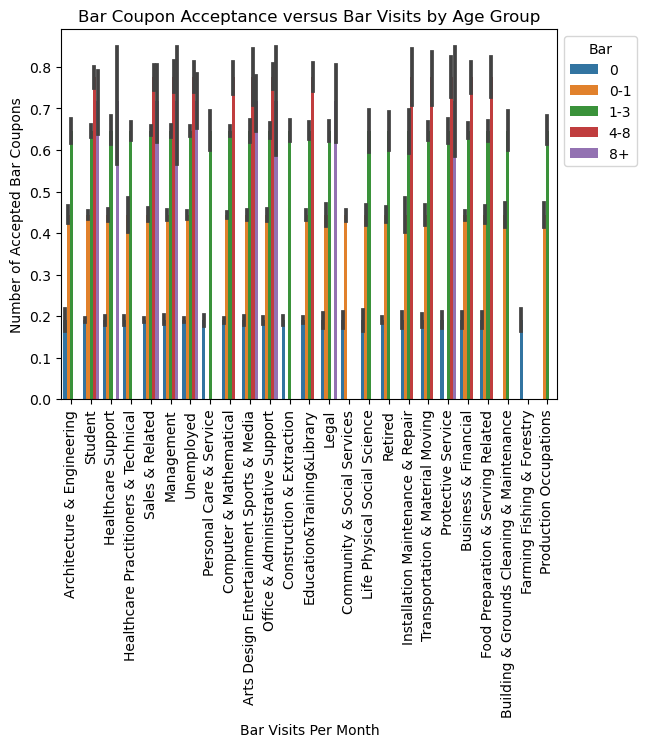

In [453]:
#make a plot to visualize the data
occ_plot = sns.barplot(data = filts, x = "occupation_x", y = "coupon_accepted_y", hue = "Bar", hue_order = ['0','0-1','1-3','4-8','8+'])
plt.xticks(rotation = 90)
plt.xlabel('Bar Visits Per Month')
plt.ylabel('Number of Accepted Bar Coupons')
plt.title('Bar Coupon Acceptance versus Bar Visits by Age Group')
sns.move_legend(occ_plot, "upper left", bbox_to_anchor=(1,1))

>**Overall, 71.79% of drivers who had a passenger who was not a kid, and had occupations other than Farming Fishing & Forestry accepted the coupon.**

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [454]:
#goes to bars more than once a month, had passengers who were not kids, were not widowed
market_analysis2 = (bar_coupons.groupby(['Bar','passanger','maritalStatus']).size()/bar_coupons['coupon_accepted'].count())*100
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
    print(market_analysis2)

Bar    passanger  maritalStatus    
1~3    Alone      Divorced              0.418
                  Married partner       3.293
                  Single                4.966
                  Unmarried partner     2.561
       Friend(s)  Divorced              0.157
                  Married partner       1.098
                  Single                2.039
                  Unmarried partner     0.627
       Kid(s)     Divorced              0.105
                  Married partner       1.307
                  Single                0.157
                  Unmarried partner     0.209
       Partner    Married partner       1.202
                  Single                0.157
                  Unmarried partner     1.516
4~8    Alone      Divorced              0.105
                  Married partner       0.627
                  Single                3.921
                  Unmarried partner     0.575
       Friend(s)  Married partner       0.052
                  Single                0.94

>**Discovered 71.79% of drivers who visit a bar more than once a month and had passengers who were not a kid accepted the coupon. There is not a specific 'widowed' option, so it is assumed this data point is not a part of the percentage.**

In [183]:
#replace strings in the RestaurantLessThan20 column for better sortation / readability
bar_rest = bar_coupons_visits
bar_rest["RestaurantLessThan20"] = bar_rest["RestaurantLessThan20"].str.replace('never','0')
bar_rest["RestaurantLessThan20"] = bar_rest["RestaurantLessThan20"].str.replace('less1','0')
bar_rest["RestaurantLessThan20"] = bar_rest["RestaurantLessThan20"].str.replace('1~3','1-3')
bar_rest["RestaurantLessThan20"] = bar_rest["RestaurantLessThan20"].str.replace('4~8','4-8')
bar_rest["RestaurantLessThan20"] = bar_rest["RestaurantLessThan20"].str.replace('gt8','8+')
bar_rest['RestaurantLessThan20']

24       4-8
35       4-8
39       4-8
46       1-3
57       1-3
        ... 
12663    4-8
12664    4-8
12667    4-8
12670    4-8
12682    4-8
Name: RestaurantLessThan20, Length: 1913, dtype: object

In [188]:
#remove the dollar signs
bar_rest['income'] = bar_rest['income'].astype(str)
bar_rest['income'] = bar_rest['income'].replace('\$', '', regex = True)
bar_rest['income']

10168    0-12500
7130     0-12500
9080     0-12500
9083     0-12500
9086     0-12500
          ...   
12018    >100000
10502    >100000
10499    >100000
2112     >100000
5449     >100000
Name: income, Length: 1913, dtype: object

In [187]:
#replace strings in 'income' column
bar_rest["income"] = bar_rest["income"].str.replace('100000 or More','0-12500')
bar_rest["income"] = bar_rest["income"].str.replace('Less than 12500','>100000')
bar_rest = bar_rest.sort_values('income', ascending = True)

In [189]:
#find acceptance rate for drivers who go to cheap restaurants more than 4 times a month and whose income is less than 50k
market_analysis4 = (bar_rest.groupby(['RestaurantLessThan20','income']).size()/bar_rest['coupon_accepted'].count())*100
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
    print(market_analysis4)

RestaurantLessThan20  income       
0                     0-12500          1.045
                      12500 - 24999    2.718
                      25000 - 37499    4.443
                      37500 - 49999    1.359
                      50000 - 62499    1.882
                      62500 - 74999    1.307
                      75000 - 87499    1.098
                      87500 - 99999    2.196
                      >100000          1.725
1-3                   0-12500          5.855
                      12500 - 24999    6.430
                      25000 - 37499    7.371
                      37500 - 49999    6.848
                      50000 - 62499    7.162
                      62500 - 74999    2.143
                      75000 - 87499    2.927
                      87500 - 99999    2.352
                      >100000          2.771
4-8                   0-12500          5.489
                      12500 - 24999    3.764
                      25000 - 37499    2.980
                   

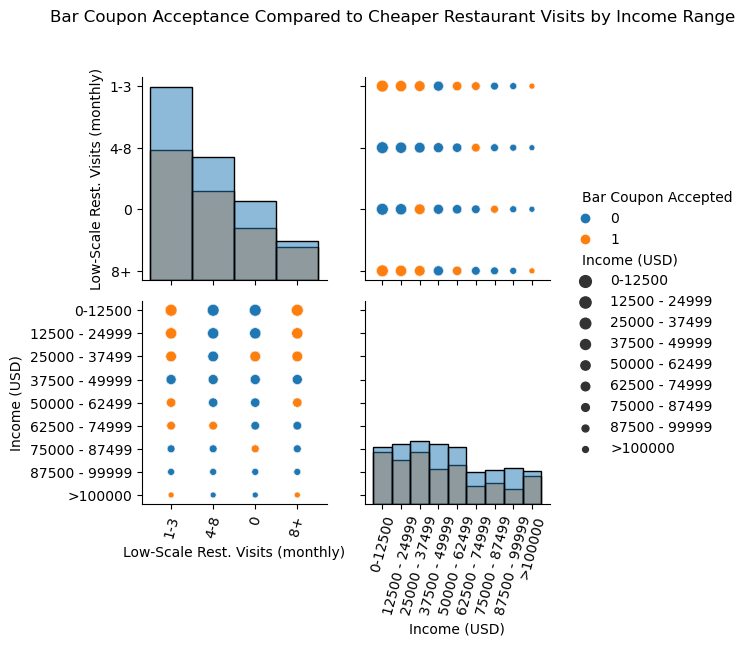

In [191]:
#create a plot to visualize the data
bar_rest1 = bar_rest.rename(columns = {"RestaurantLessThan20" : "Low-Scale Rest. Visits (monthly)","income" : "Income (USD)","coupon_accepted" : "Bar Coupon Accepted"})
variables = ["Low-Scale Rest. Visits (monthly)","Income (USD)"]
bar_coupons_plot = sns.PairGrid(bar_rest1,hue = "Bar Coupon Accepted",vars = variables)
bar_coupons_plot.map_diag(sns.histplot)
bar_coupons_plot.map_offdiag(sns.scatterplot, size=bar_rest1["Income (USD)"])
bar_coupons_plot.add_legend(title="", adjust_subtitles=True)
bar_coupons_plot.fig.suptitle("Bar Coupon Acceptance Compared to Cheaper Restaurant Visits by Income Range", y=1.10)
for ax in bar_coupons_plot.axes.flatten():
    ax.tick_params(axis='x',labelrotation = 75)

>**Discovered 45.35% of drivers who visit a cheap restaurant more than four times per month who have an income of less than $50,000 accept the coupon for the bar.**

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers are more likely to accept a bar coupon if they:
- have a passenger who is not a kid
- visit a bar fewer than three times per month
- visit a low-scale restaurant more than four times per month
- have an income less than $50,000

Age does not impact marketability much, but if an age were desired, drivers over the age of 25 who never visit a bar are more likely to accept a coupon, and more specifically, drivers between ages 21 and 31 are more likely to accept if they visit a bar more than once per month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

#### Import the file and investigate the dataset.

In [248]:
coupons = pd.read_csv('data/coupons.csv')

In [249]:
coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [250]:
coupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### Check dataset for null values and clean up any nulls.

In [251]:
#checking for null values
coupons.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [252]:
#drop the car column since there are only 108 rows of data in the column
coupons = coupons.drop('car', axis = 1)
coupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [253]:
#drop rows with null values
coupons = coupons.dropna(axis = 0)
coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

#### Create the DataFrame to learn what sort of drivers accepted Coffee House coupons.

In [373]:
#pulling columns I desire from the original dataset
coffee = coupons[['destination','passanger','coupon','age','education','occupation','income','CoffeeHouse','CarryAway','direction_same','direction_opp','Y']].copy()
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   destination     12079 non-null  object
 1   passanger       12079 non-null  object
 2   coupon          12079 non-null  object
 3   age             12079 non-null  object
 4   education       12079 non-null  object
 5   occupation      12079 non-null  object
 6   income          12079 non-null  object
 7   CoffeeHouse     12079 non-null  object
 8   CarryAway       12079 non-null  object
 9   direction_same  12079 non-null  int64 
 10  direction_opp   12079 non-null  int64 
 11  Y               12079 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.2+ MB


In [374]:
#filtering the custom dataset to only include rows where a Coffee House coupon was available to the driver
coffee = pd.DataFrame(coffee.query('coupon == "Coffee House"'))
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 23 to 12681
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   destination     3816 non-null   object
 1   passanger       3816 non-null   object
 2   coupon          3816 non-null   object
 3   age             3816 non-null   object
 4   education       3816 non-null   object
 5   occupation      3816 non-null   object
 6   income          3816 non-null   object
 7   CoffeeHouse     3816 non-null   object
 8   CarryAway       3816 non-null   object
 9   direction_same  3816 non-null   int64 
 10  direction_opp   3816 non-null   int64 
 11  Y               3816 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 387.6+ KB


#### Find the proportion of users who accepted the Coffee House coupon

In [256]:
#find proportion of users who accepted the coupon
coffee_prop = (coffee['Y'].value_counts(normalize=True) * 100)
coffee_prop

Y
0    50.366876
1    49.633124
Name: proportion, dtype: float64

>**Discovered 49.63% of drivers accepted the coffee house coupon.**

#### Compare the acceptance rate of drivers who visited a coffee house three or less times a month to those who visited more often.

In [375]:
#replace Y column with better name
coffee = coffee.rename(columns = {"Y" : "coupon_accepted"})
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 23 to 12681
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   destination      3816 non-null   object
 1   passanger        3816 non-null   object
 2   coupon           3816 non-null   object
 3   age              3816 non-null   object
 4   education        3816 non-null   object
 5   occupation       3816 non-null   object
 6   income           3816 non-null   object
 7   CoffeeHouse      3816 non-null   object
 8   CarryAway        3816 non-null   object
 9   direction_same   3816 non-null   int64 
 10  direction_opp    3816 non-null   int64 
 11  coupon_accepted  3816 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 387.6+ KB


In [258]:
#replace strings in the CoffeeHouse column to group visits for easier readability
ch_visits = coffee.copy()
ch_visits["CoffeeHouse"] = ch_visits["CoffeeHouse"].str.replace('never','0-3')
ch_visits["CoffeeHouse"] = ch_visits["CoffeeHouse"].str.replace('less1','0-3')
ch_visits["CoffeeHouse"] = ch_visits["CoffeeHouse"].str.replace('1~3','0-3')
ch_visits["CoffeeHouse"] = ch_visits["CoffeeHouse"].str.replace('4~8','4+')
ch_visits["CoffeeHouse"] = ch_visits["CoffeeHouse"].str.replace('gt8','4+')
ch_visits['CoffeeHouse']

23       0-3
26       0-3
27       0-3
28       0-3
30       0-3
        ... 
12656    0-3
12659    0-3
12674    0-3
12675    0-3
12681    0-3
Name: CoffeeHouse, Length: 3816, dtype: object

In [259]:
#find acceptance rate for drivers who visits a coffee house fewer than 3 times a week and compare to those who visit more often
coffee_ma1 = (ch_visits.groupby(['CoffeeHouse']).size()/ch_visits['coupon_accepted'].count())*100
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
    print(coffee_ma1)

CoffeeHouse
0-3    77.752
4+     22.248
dtype: float64


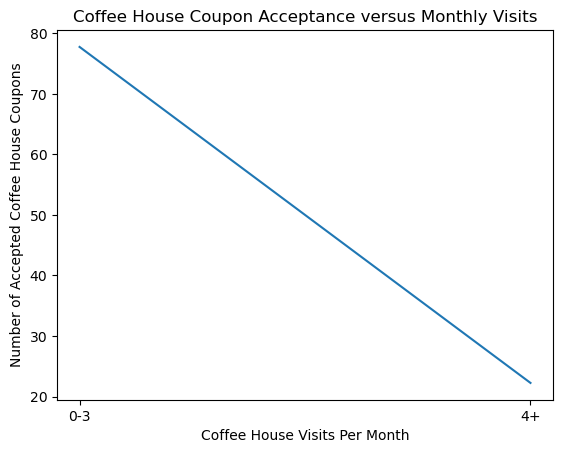

In [311]:
#create a plot to visualize the data
sns.lineplot(data = coffee_ma1)
plt.xlabel('Coffee House Visits Per Month')
plt.ylabel('Number of Accepted Coffee House Coupons')
plt.title('Coffee House Coupon Acceptance versus Monthly Visits')
plt.show()

>**Discovered 77.75% of drivers who visit a coffee house fewer than three times per month accepted the coupon. Comparitively, 22.25% of drivers visit a coffee house more than three times a week and accepted the coupon.**

#### Compare the acceptance rate between drivers over the age of 25 who visited a coffee house more than once per month to those who were under 25.
>Is there a difference or skew in the data?

In [261]:
#replace strings in the CoffeeHouse column to group visits for easier readability
ch_age_visits = coffee.copy()
ch_age_visits["CoffeeHouse"] = ch_age_visits["CoffeeHouse"].str.replace('never','<1')
ch_age_visits["CoffeeHouse"] = ch_age_visits["CoffeeHouse"].str.replace('less1','<1')
ch_age_visits["CoffeeHouse"] = ch_age_visits["CoffeeHouse"].str.replace('1~3','1+')
ch_age_visits["CoffeeHouse"] = ch_age_visits["CoffeeHouse"].str.replace('4~8','1+')
ch_age_visits["CoffeeHouse"] = ch_age_visits["CoffeeHouse"].str.replace('gt8','1+')
ch_age_visits["CoffeeHouse"]

23       <1
26       <1
27       <1
28       <1
30       <1
         ..
12656    <1
12659    <1
12674    <1
12675    <1
12681    <1
Name: CoffeeHouse, Length: 3816, dtype: object

In [262]:
#replace strings in the age column to group ages for easier readability
ch_age_visits["age"] = ch_age_visits["age"].str.replace('below21','0-20')
ch_age_visits["age"] = ch_age_visits["age"].str.replace('21','21')
ch_age_visits["age"] = ch_age_visits["age"].str.replace('26','25+')
ch_age_visits["age"] = ch_age_visits["age"].str.replace('31','25+')
ch_age_visits["age"] = ch_age_visits["age"].str.replace('36','25+')
ch_age_visits["age"] = ch_age_visits["age"].str.replace('41','25+')
ch_age_visits["age"] = ch_age_visits["age"].str.replace('46','25+')
ch_age_visits["age"] = ch_age_visits["age"].str.replace('50plus','25+')
ch_age_visits['age']

23        21
26        21
27        21
28        21
30        21
        ... 
12656    25+
12659    25+
12674    25+
12675    25+
12681    25+
Name: age, Length: 3816, dtype: object

In [263]:
#find acceptance rate
coffee_ma2 = (ch_age_visits.groupby(['CoffeeHouse','age']).size()/ch_age_visits['coupon_accepted'].count())*100
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
    print(coffee_ma2)

CoffeeHouse  age 
1+           0-20     2.883
             21      10.954
             25+     35.115
<1           0-20     0.865
             21      11.164
             25+     39.020
dtype: float64


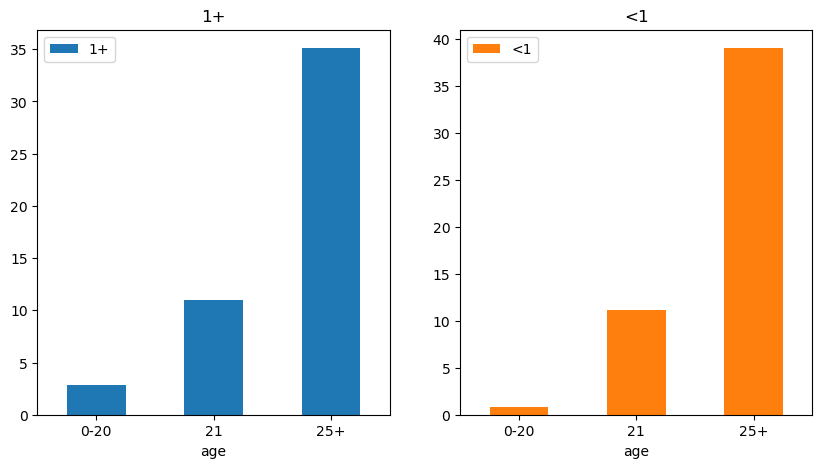

In [411]:
ch_ma2_plot = coffee_ma2.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(10, 5), layout=(1, 2))

>**Discovered 35.12% of drivers over the age of 25 who visit a coffee house more than once per month accepted the coupon. Comparitively, 39.02% of drivers over the age of 25 who visit less than once per month accepted the coupon.**
>>Overall, drivers over the age of 21 make up the largest proportion of coupon acceptance, regardless of how many times they typically visit a coffee shop. Since this age group is quite large though, this makes sense it would be a much larger percentage.

#### Compare acceptance rate for age ranges on a smaller scale.

In [264]:
#replace strings in the CoffeeHouse column to group visits for easier readability
ch_age_visits2 = coffee.copy()
ch_age_visits2["CoffeeHouse"] = ch_age_visits2["CoffeeHouse"].str.replace('never','0')
ch_age_visits2["CoffeeHouse"] = ch_age_visits2["CoffeeHouse"].str.replace('less1','<1')
ch_age_visits2["CoffeeHouse"] = ch_age_visits2["CoffeeHouse"].str.replace('1~3','1-3')
ch_age_visits2["CoffeeHouse"] = ch_age_visits2["CoffeeHouse"].str.replace('4~8','4-8')
ch_age_visits2["CoffeeHouse"] = ch_age_visits2["CoffeeHouse"].str.replace('gt8','8+')
ch_age_visits2["CoffeeHouse"]

23       <1
26       <1
27       <1
28       <1
30       <1
         ..
12656     0
12659     0
12674     0
12675     0
12681     0
Name: CoffeeHouse, Length: 3816, dtype: object

In [265]:
#replace strings in the age column to group ages for easier readability
ch_age_visits2["age"] = ch_age_visits2["age"].str.replace('below21','0-20')
ch_age_visits2["age"] = ch_age_visits2["age"].str.replace('21','21-29')
ch_age_visits2["age"] = ch_age_visits2["age"].str.replace('26','21-29')
ch_age_visits2["age"] = ch_age_visits2["age"].str.replace('31','31-39')
ch_age_visits2["age"] = ch_age_visits2["age"].str.replace('36','31-39')
ch_age_visits2["age"] = ch_age_visits2["age"].str.replace('41','41-49')
ch_age_visits2["age"] = ch_age_visits2["age"].str.replace('46','41-49')
ch_age_visits2["age"] = ch_age_visits2["age"].str.replace('50plus','50+')
ch_age_visits2['age']

23       21-29
26       21-29
27       21-29
28       21-29
30       21-29
         ...  
12656    31-39
12659    31-39
12674    21-29
12675    21-29
12681    21-29
Name: age, Length: 3816, dtype: object

In [266]:
#find acceptance rate
coffee_ma3 = (ch_age_visits2.groupby(['CoffeeHouse','age']).size()/ch_age_visits2['coupon_accepted'].count())*100
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
    print(coffee_ma3)

CoffeeHouse  age  
0            0-20      0.472
             21-29     9.067
             31-39     6.578
             41-49     2.673
             50+       4.691
1-3          0-20      1.913
             21-29    12.474
             31-39     6.316
             41-49     3.800
             50+       2.201
4-8          0-20      0.419
             21-29     5.084
             31-39     3.223
             41-49     1.808
             50+       2.752
8+           0-20      0.550
             21-29     4.350
             31-39     2.254
             41-49     0.734
             50+       1.074
<1           0-20      0.393
             21-29    12.028
             31-39     7.023
             41-49     4.979
             50+       3.145
dtype: float64


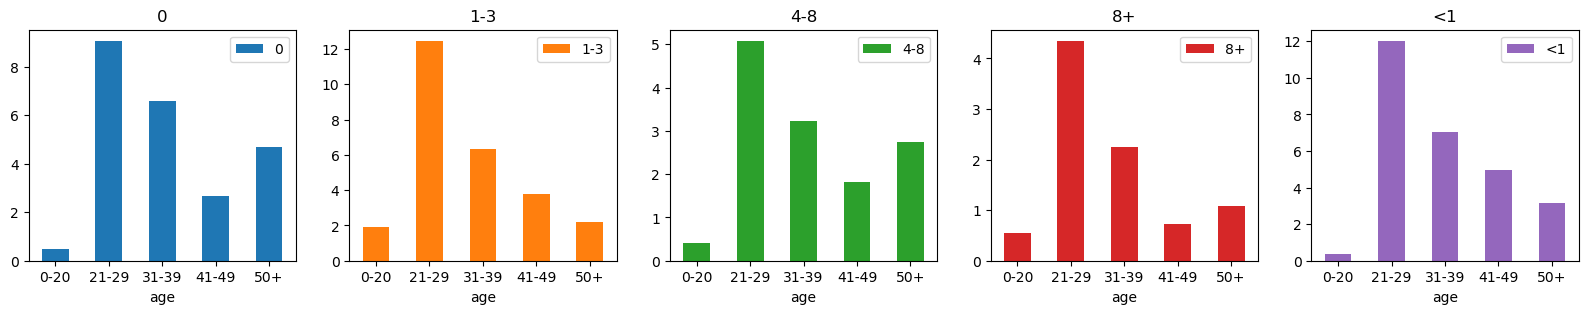

In [408]:
ch_ma3_plot = coffee_ma3.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(20, 3), layout=(1, 5))

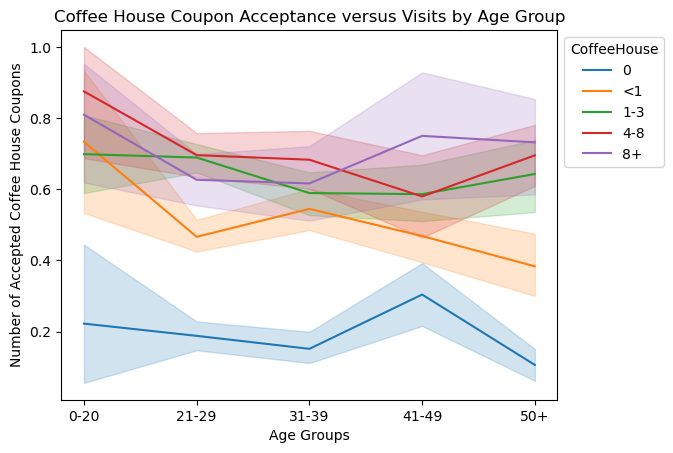

In [282]:
#create a plot to help visualize the data
ch_plot = sns.lineplot(data = ch_age_visits2.sort_values(by='age'), x = 'age', y = 'coupon_accepted', hue = "CoffeeHouse", hue_order = ['0','<1','1-3','4-8','8+'])
plt.xlabel('Age Groups')
plt.ylabel('Number of Accepted Coffee House Coupons')
plt.title('Coffee House Coupon Acceptance versus Visits by Age Group')
sns.move_legend(ch_plot, "upper left", bbox_to_anchor=(1,1))

>**For a smaller, more targeted set of individuals by age, people between the ages of 21 and 29 tend to accept coffee house coupons if they visit a coffee house less than 3 times per month.** 
>>Looking at the data as a whole though, this still is not a huge number of potential customers who are likely to accept the coupon since this group makes up 24.49% of the total acceptance rate.

#### Compare the acceptance rate between drivers who have no passengers and are driving to work to drivers who are going home or have no urgent place to be.

In [297]:
#filter data to columns relevant and for specific type of passenger (or, in this case, lack of)
ch_dest = coffee[['destination','passanger','CoffeeHouse','coupon_accepted']]
ch_dest = ch_dest.query("passanger == 'Alone'")
ch_dest.head()

,destination,passanger,CoffeeHouse,coupon_accepted
34,No Urgent Place,Alone,less1,0
37,Home,Alone,less1,0
38,Work,Alone,less1,0
43,Work,Alone,less1,0
56,No Urgent Place,Alone,4~8,1


In [298]:
#replace strings in the CoffeeHouse column to group visits for easier readability
ch_dest2 = coffee.copy()
ch_dest2["CoffeeHouse"] = ch_dest2["CoffeeHouse"].str.replace('never','0')
ch_dest2["CoffeeHouse"] = ch_dest2["CoffeeHouse"].str.replace('less1','<1')
ch_dest2["CoffeeHouse"] = ch_dest2["CoffeeHouse"].str.replace('1~3','1-3')
ch_dest2["CoffeeHouse"] = ch_dest2["CoffeeHouse"].str.replace('4~8','4-8')
ch_dest2["CoffeeHouse"] = ch_dest2["CoffeeHouse"].str.replace('gt8','8+')
ch_dest2["CoffeeHouse"]

23       <1
26       <1
27       <1
28       <1
30       <1
         ..
12656     0
12659     0
12674     0
12675     0
12681     0
Name: CoffeeHouse, Length: 3816, dtype: object

In [300]:
#find acceptance rate
coffee_ma5 = (ch_dest2.groupby(['destination']).size()/ch_dest2['coupon_accepted'].count())*100
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
    print(coffee_ma5)

destination
Home               23.27
No Urgent Place    53.80
Work               22.93
dtype: float64


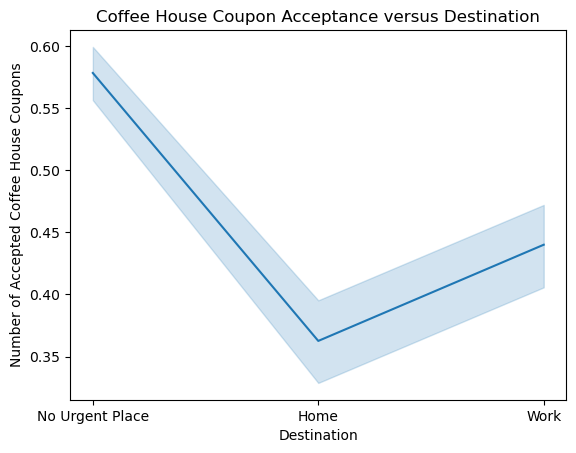

In [310]:
#create a plot to help visualize the data
sns.lineplot(data = ch_dest2, x = 'destination', y = 'coupon_accepted')
plt.xlabel('Destination')
plt.ylabel('Number of Accepted Coffee House Coupons')
plt.title('Coffee House Coupon Acceptance versus Destination')
plt.show()

>**Drivers who are on their way to work accept a coupon 22.93% of the time, however, drivers with no urgent destination accept a coupon for a coffee house 53.80% of the time.**

#### Following up from the above data, how do monthly coffee house visits tie in to a drivers destination and acceptance of a coupon.

In [299]:
#find acceptance rate
coffee_ma4 = (ch_dest2.groupby(['CoffeeHouse','destination']).size()/ch_dest2['coupon_accepted'].count())*100
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
    print(coffee_ma4)

CoffeeHouse  destination    
0            Home                5.660
             No Urgent Place    12.317
             Work                5.503
1-3          Home                5.975
             No Urgent Place    14.701
             Work                6.027
4-8          Home                3.197
             No Urgent Place     7.128
             Work                2.961
8+           Home                2.201
             No Urgent Place     4.560
             Work                2.201
<1           Home                6.237
             No Urgent Place    15.094
             Work                6.237
dtype: float64


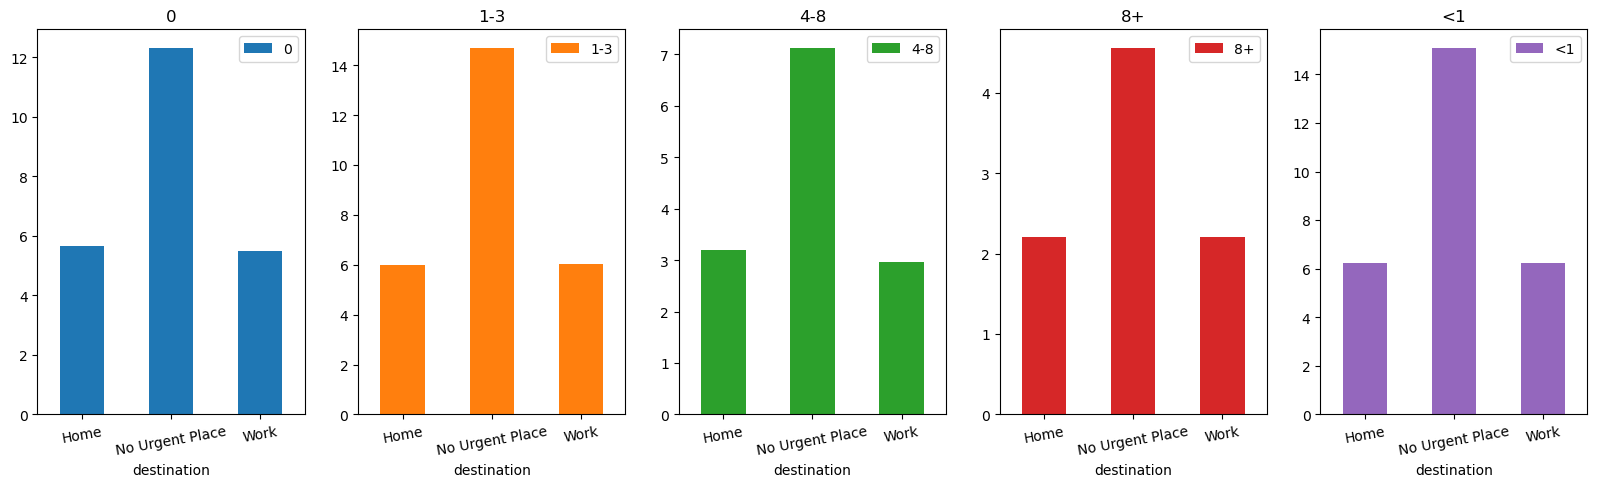

In [405]:
#create a plot to help visualize the data
ch_ma4_plot = coffee_ma4.unstack(level=0).plot(kind='bar', subplots=True, rot=10, figsize=(20, 5), layout=(1, 5))

>**Drivers with no urgent destination who visit a coffee house less than three times per month are more likely to accept a coupon (42.11%).**
>>This helps understand how unrecognized biases could be brought to the surface when exploring data. A marketing company could potentially target a coffee house coupon to individuals as they are driving to work from a belief that individuals tend to stop for coffee on their way to work most often, but based on this data, it's unlikely (22.93%) the coupon would be accepted by the customer during this trip.

#### Compare acceptance rates of drivers who had a passenger of any kind and an education level above high school to those with an education level high school or lower.

In [316]:
#filter data to columns relevant
ch_pass_hs = coffee[['passanger','education','coupon_accepted']]
ch_pass_hs.head()

,passanger,education,coupon_accepted
23,Friend(s),Bachelors degree,0
26,Friend(s),Bachelors degree,0
27,Friend(s),Bachelors degree,0
28,Friend(s),Bachelors degree,0
30,Friend(s),Bachelors degree,0


In [318]:
#find acceptance rate
coffee_ma6 = (ch_pass_hs.groupby(['passanger','education']).size()/ch_pass_hs['coupon_accepted'].count())*100
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
    print(coffee_ma6)

passanger  education                             
Alone      Associates degree                          4.769
           Bachelors degree                          18.789
           Graduate degree (Masters or Doctorate)     8.857
           High School Graduate                       4.219
           Some High School                           0.498
           Some college - no degree                  19.392
Friend(s)  Associates degree                          2.358
           Bachelors degree                          10.587
           Graduate degree (Masters or Doctorate)     4.298
           High School Graduate                       2.358
           Some High School                           0.105
           Some college - no degree                  11.085
Kid(s)     Associates degree                          0.550
           Bachelors degree                           1.834
           Graduate degree (Masters or Doctorate)     1.074
           High School Graduate                   

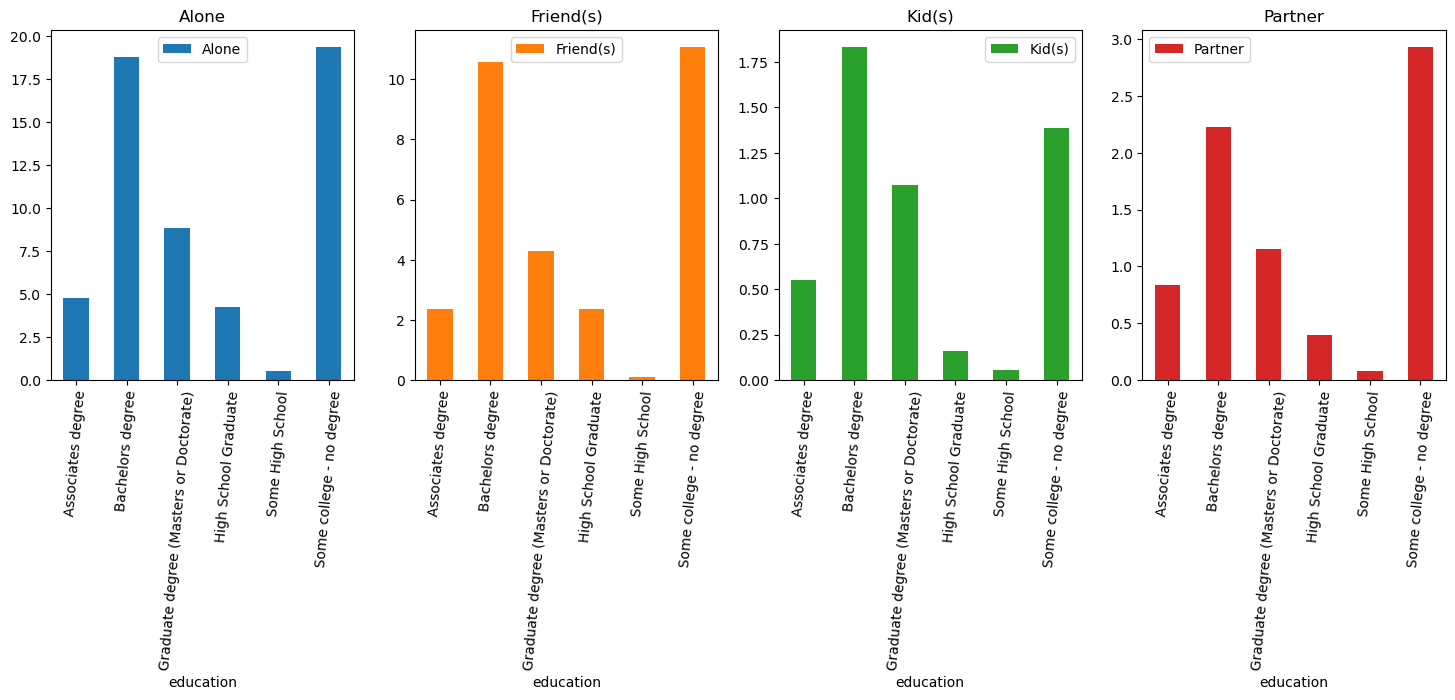

In [331]:
#create a plot to help visualize the data
ch_ma6_plot = coffee_ma6.unstack(level=0).plot(kind='bar', subplots=True, rot=85, figsize=(18, 10), layout=(2, 4))

>**Drivers with some college experience or with a degree above a Bachelor's accepted the coffee house coupon more often, but were more likely to do so when driving alone.**

#### Find the acceptance rate for driver's who were alone.

In [336]:
#find acceptance rate for passenger types
coffee_ma7 = (ch_pass_hs.groupby(['passanger']).size()/ch_pass_hs['coupon_accepted'].count())*100
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
    print(coffee_ma7)

passanger
Alone        56.525
Friend(s)    30.791
Kid(s)        5.058
Partner       7.626
dtype: float64


>**Drivers who were alone accepted the coupon 56.53% of the time.**

#### Find the acceptance rate based on a driver's education level.

In [333]:
#find acceptance rate for education level
coffee_ma8 = (ch_pass_hs.groupby(['education']).size()/ch_pass_hs['coupon_accepted'].count())*100
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
    print(coffee_ma8)

education
Associates degree                          8.517
Bachelors degree                          33.438
Graduate degree (Masters or Doctorate)    15.383
High School Graduate                       7.128
Some High School                           0.734
Some college - no degree                  34.801
dtype: float64


>**Drivers with some college experience or a Bachelor's are more likely to accept a coupon (68.24%).**

#### Find the acceptance rate of driver's who make less than $50k and get carry out more than four times per month.

In [418]:
#filter data to columns relevant
ch_cain = coffee[['CarryAway','income','coupon_accepted']].copy()
ch_cain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 23 to 12681
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CarryAway        3816 non-null   object
 1   income           3816 non-null   object
 2   coupon_accepted  3816 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 119.2+ KB


In [419]:
#find distinct values in income column to adjust strings
for col in ch_cain:
  print(ch_cain[col].unique())

['4~8' '1~3' 'gt8' 'less1' 'never']
['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
[0 1]


In [420]:
#replace strings in 'income' column
ch_cain["income"] = ch_cain["income"].str.replace('Less than $12500','0-12499')
ch_cain["income"] = ch_cain["income"].str.replace('$12500 - $24999','12500-24999')
ch_cain["income"] = ch_cain["income"].str.replace('$25000 - $37499','25000-37499')
ch_cain["income"] = ch_cain["income"].str.replace('$37500 - $49999','37500-49999')
ch_cain["income"] = ch_cain["income"].str.replace('$50000 - $62499','50000-62499')
ch_cain["income"] = ch_cain["income"].str.replace('$62500 - $74999','62500-74999')
ch_cain["income"] = ch_cain["income"].str.replace('$75000 - $87499','75000-87499')
ch_cain["income"] = ch_cain["income"].str.replace('$87500 - $99999','87500-99999')
ch_cain["income"] = ch_cain["income"].str.replace('$100000 or More','>100000')
ch_cain = ch_cain.sort_values('income', ascending = True)

In [421]:
#remove the dollar signs
ch_cain['income'] = ch_cain['income'].astype(str)
ch_cain['income'] = ch_cain['income'].replace('\$', '', regex = True)
ch_cain['income']

10243    0-12499
4043     0-12499
5436     0-12499
5439     0-12499
5442     0-12499
          ...   
9069     >100000
9072     >100000
9073     >100000
3331     >100000
3326     >100000
Name: income, Length: 3816, dtype: object

In [422]:
#replace strings in the CarryAway column to group visits for easier readability
ch_cain["CarryAway"] = ch_cain["CarryAway"].str.replace('never','<4')
ch_cain["CarryAway"] = ch_cain["CarryAway"].str.replace('less1','<4')
ch_cain["CarryAway"] = ch_cain["CarryAway"].str.replace('1~3','4+')
ch_cain["CarryAway"] = ch_cain["CarryAway"].str.replace('4~8','4+')
ch_cain["CarryAway"] = ch_cain["CarryAway"].str.replace('gt8','4+')
ch_cain["CarryAway"]

10243    4+
4043     4+
5436     <4
5439     <4
5442     <4
         ..
9069     4+
9072     4+
9073     4+
3331     4+
3326     4+
Name: CarryAway, Length: 3816, dtype: object

In [423]:
#find acceptance rate for passenger types
coffee_ma8 = (ch_cain.groupby(['CarryAway','income']).size()/ch_cain['coupon_accepted'].count())*100
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
    print(coffee_ma8)

CarryAway  income     
4+         0-12499         6.394
           12500-24999    12.657
           25000-37499    14.203
           37500-49999    11.845
           50000-62499    10.482
           62500-74999     6.420
           75000-87499     5.346
           87500-99999     4.900
           >100000        12.421
<4         0-12499         1.415
           12500-24999     2.149
           25000-37499     1.965
           37500-49999     2.804
           50000-62499     2.935
           62500-74999     0.681
           75000-87499     0.629
           87500-99999     1.415
           >100000         1.336
dtype: float64


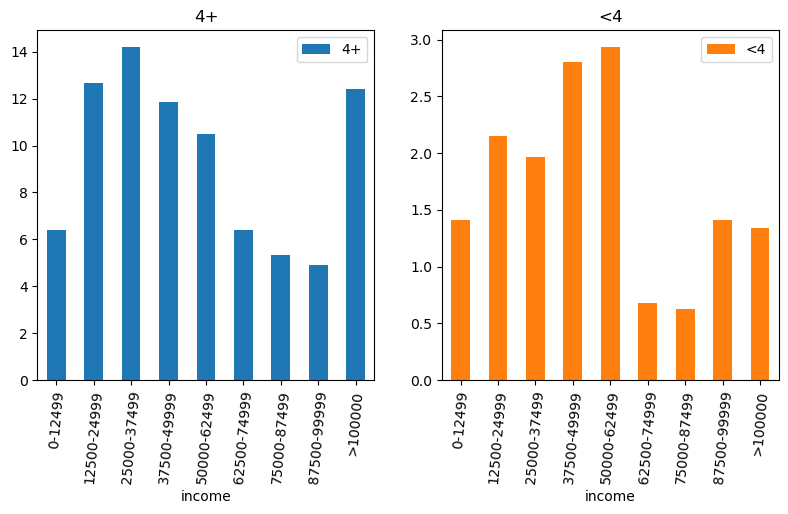

In [424]:
#create a plot to help visualize the data
ch_ma8_plot = coffee_ma8.unstack(level=0).plot(kind='bar', subplots=True, rot=85, figsize=(20, 10), layout=(2, 4))

>**Drivers who visit a carry away restaurant more than four times per month and who make between $25-40k are 14.20% likely to accept the coffee house coupon.** 
>>While this is the larger proportion for this particular section of data, the acceptance rate is not necessarily big enough to truly make it marketable.

### **Conclusion**

Based on this data, drivers are more likely to accept a coupon to a coffee house when they:
- are over the age of 25
- have some college experience or a Bachelor's degree
- do not have a passenger with them
- do not have an urgent destination
- visit a coffee house less than three times per month